# matplotlib 的主要组成元素

### 1. 初始设置

首先，导入所需的库，并设置中文字体等。

其次，生成画图用到的数据，并定义相关函数。

In [1]:
# 导入所需的库
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator, MultipleLocator, FuncFormatter
from matplotlib.patches import Circle
from matplotlib.patheffects import withStroke
import matplotlib.image as image

# 正常显示中文标签
mpl.rcParams['font.sans-serif'] = ['SimHei']

# 自动适应布局
mpl.rcParams.update({'figure.autolayout': True})

# 正常显示负号
mpl.rcParams['axes.unicode_minus'] = False

# 设置随机种子
np.random.seed(19680801)

# 生成绘图数据
X = np.linspace(0.5, 3.5, 100)
Y1 = 3+np.cos(X)
Y2 = 1+np.cos(1+X/0.75)/2
Y3 = np.random.uniform(Y1, Y2, len(X))

# 定义相关函数

# 次刻度标签的显示格式
def minor_tick(x, pos):
    if not x % 1.0:
        return ""
    return "%.2f" % x

# 圆圈的半径和颜色
def circle(x, y, radius=0.1):
    circle = Circle((x, y), radius, clip_on=False, zorder=10, 
        linewidth=1, edgecolor='#E7E6E0', facecolor=(0, 0, 0, 0),
        path_effects=[withStroke(linewidth=3, foreground=(0, 88/255, 159/255, 0.3))])
    ax.add_artist(circle)

# 文本
def text(x, y, text):
    ax.text(x, y, text, ha='center', va='top', weight='bold', color='#00589F', fontsize=13)

### 2. 开始画图

下面用 matplotlib 开始画图，其中使用的是「**面向对象**」的方法，以便对 figure 和 axes 进行更加细致的控制。

在图片的右下角，有一张林骥的头像图片，在实际的工作中，可以替换为公司的 LOGO 图片。

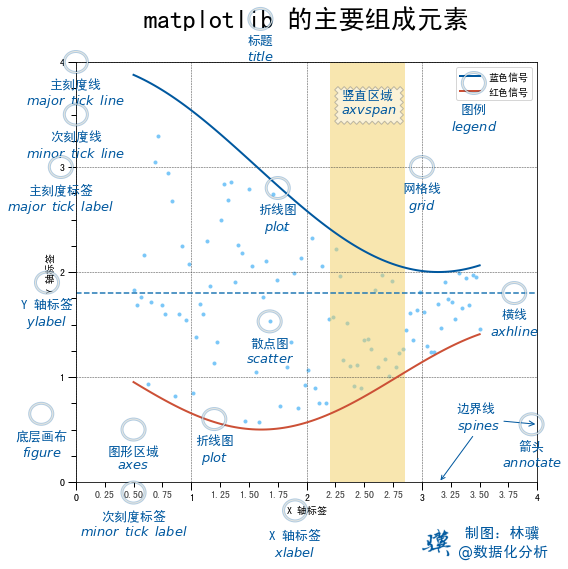

In [2]:
# 使用「面向对象」的方法画图
fig, ax = plt.subplots(figsize=(8, 8))

# 设置主次刻度的位置和格式
ax.xaxis.set_major_locator(MultipleLocator(1.0))
ax.xaxis.set_minor_locator(AutoMinorLocator(4))
ax.yaxis.set_major_locator(MultipleLocator(1.0))
ax.yaxis.set_minor_locator(AutoMinorLocator(4))
ax.xaxis.set_minor_formatter(FuncFormatter(minor_tick))

# 设置坐标轴的范围
ax.set_xlim(0, 4)
ax.set_ylim(0, 4)

# 设置刻度参数
ax.tick_params(which='major', width=1.0)
ax.tick_params(which='major', length=8)
ax.tick_params(which='minor', width=1.0, labelsize=10)
ax.tick_params(which='minor', length=5, labelsize=10, labelcolor='0.25')

# 设置网格线
ax.grid(linestyle="--", linewidth=0.5, color='.25', zorder=-10)

# 画两条曲线
ax.plot(X, Y1, c='#00589F', lw=2, label="蓝色信号", zorder=10)
ax.plot(X, Y2, c='#CC5036', lw=2, label="红色信号")

# 画散点图
ax.scatter(X, Y3, marker='.', color='#7AC7F8')

# 设置标题和坐标轴标签
ax.set_title("matplotlib 的主要组成元素\n", fontsize=26, verticalalignment='bottom')
ax.set_xlabel("X 轴标签")
ax.set_ylabel("Y 轴标签")

# 显示图例
ax.legend()

# 画圆圈和文本标注
circle(-0.13, 3.00)
text(-0.13, 2.85, "主刻度标签\n" + r'$major$' + ' ' + r'$tick$' + ' ' + r'$label$')

circle(0.50, -0.10)
text(0.50, -0.25, "次刻度标签\n" + r'$minor$' + ' ' + r'$tick$' + ' ' + r'$label$')

circle(0, 4.00)
text(0, 3.85, "主刻度线\n" + r'$major$' + ' ' + r'$tick$' + ' ' + r'$line$')

circle(0.00, 3.50)
text(0.00, 3.35, "次刻度线\n" + r'$minor$' + ' ' + r'$tick$' + ' ' + r'$line$')

circle(1.90, -0.27)
text(1.90, -0.45, "X 轴标签\n" + r'$xlabel$')

circle(-0.25, 1.90)
text(-0.25, 1.75, "Y 轴标签\n" + r'$ylabel$')

circle(1.60, 4.41)
text(1.60, 4.26, "标题\n" + r'$title$')

# 蓝线
circle(1.75, 2.80)
text(1.75, 2.65, "折线图\n" + r'$plot$')

# 红线
circle(1.20, 0.60)
text(1.20, 0.45, "折线图\n" + r'$plot$')

circle(1.68, 1.53)
text(1.68, 1.38, "散点图\n" + r'$scatter$')

circle(3.00, 3.00)
text(3.00, 2.85, "网格线\n" + r'$grid$')

circle(3.45, 3.80)
text(3.45, 3.6, "图例\n" + r'$legend$')

circle(0.5, 0.5)
text(0.5, 0.35, "图形区域\n" + r'$axes$')

circle(-0.3, 0.65)
text(-0.3, 0.5, "底层画布\n" + r'$figure$')

color = '#00589F'
ax.annotate("边界线\n" + r'$spines$', xy=(4.0, 0.55), xytext=(3.3, 0.5), weight='bold', color=color, fontsize=13,
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color))

ax.annotate('', xy=(3.15, 0.0), xytext=(3.45, 0.45), weight='bold', color=color,
            arrowprops=dict(arrowstyle='->', connectionstyle="arc3", color=color))
# 箭头
circle(3.95, 0.55)
text(3.95, 0.4, "箭头\n" + r'$annotate$')

# 设置字体，可通过 mpl.font_manager.fontManager.ttflist 查看
font={'family':'SimHei', 'color':'#00589F', 'size':15}
# 标示制图的作者信息
ax.text(3.3, -0.7, ' 制图：林骥\n' + r'$@$' + '数据化分析', fontdict=font)

# 画一条横线
ax.axhline(y=1.8, xmin=0, xmax=4, ls='--')
circle(3.8, 1.8)
text(3.8, 1.65, "横线\n" + r'$axhline$')

# 画竖直区域
ax.axvspan(xmin=2.2, xmax=2.85, facecolor='#F2CF60', alpha=0.5)

# 指示区域
bbox_props = dict(boxstyle="round", fc="1", ec="0.5", alpha=0.5)
t = ax.text(2.3, 3.6, "竖直区域\n" + r'$axvspan$', ha="left", va="center", c='#00589F', size=13, bbox=bbox_props)
bb = t.get_bbox_patch()
bb.set_boxstyle("sawtooth", pad=0.5)

# 在另一个坐标轴中添加 LOGO 图片
im = image.imread('linji.jpg')
ax2 = fig.add_axes([0.73, 0.017, 0.066, 0.066])
ax2.imshow(im, aspect='auto', extent=(0, 1, 0, 1), zorder=-1)
# 隐藏刻度线
ax2.set_xticks([])
ax2.set_yticks([])
# 隐藏边框
ax2.spines['top'].set_visible(False)
ax2.spines['right'].set_visible(False)
ax2.spines['bottom'].set_visible(False)
ax2.spines['left'].set_visible(False)

plt.show()

> 关于作者：林骥，从 2008 年开始从事数据分析工作，坚持用心做原创，用数据化解难题，让分析更加有效，@数据化分析。

![ ](https://tva1.sinaimg.cn/large/00831rSTgy1gdphsox783j30pv0b0q4q.jpg)

▲ 扫码进入公众号后台，发送「入群」，加入林骥的读者交流群。

转载请保留作者信息，并注明来源：https://github.com/linjiwx/mp